# **Dataset Creation**
In this notebook, the creation of a simple annotated dataset for image classification tasks will be covered. The dataset will be created in PyTorch because these are then compatible with the use of pre-trained torch models. 

First, the needed libraries are imported.

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
import os
import matplotlib.pyplot as plt
import numpy as np

c:\python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
Here 

NameError: name 'Here' is not defined

In [40]:
mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

# transforms.compose is used to perform multiple sequential transformations on an image 
data_transforms = {
    'train': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
    ]),
    'val': transforms.Compose([
        transforms.ToTensor(), 
        transforms.Normalize(mean,std)
    ])
}

We will create a tiny custom dataset of images from 4 different cartoons (Looney Tunes, The Simpsons, Tom & Jerry, Scooby-Doo). The images can be stored in a local folder. The corresponding labels are defined in the name of the folder.

In [42]:
data_dir = 'Custom Dataset' # change the path 
sets = ['train', 'val']

The images are loaded with the datasets.Imagefolder function. These datasets are then read with the Dataloader function. We can define the size of the batches here.

In [43]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir,x),data_transforms[x]) for x in sets}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=1,shuffle=True,num_workers=0) for x in sets}
dataloaders


{'train': <torch.utils.data.dataloader.DataLoader at 0x27704a0d300>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x27704a0dea0>}

The amount of images in the the respective subsets are obtained as follow:

In [44]:
dataset_sizes = {x: len(image_datasets[x]) for x in sets}
dataset_sizes

{'train': 8, 'val': 4}

The different class names or labels are:

In [45]:
class_names = image_datasets['train'].classes
class_names

['Looney Tunes', 'Scooby Doo', 'The Simpsons', 'Tom & Jerry']

A function is written to show the images with its corresponding label. 

In [59]:
def imshow(inp,title):
    inp = inp.numpy().transpose((1,2,0))
    inp = std * inp + mean
    inp = np.clip(inp,0,1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()

In [62]:
inputs, labels = next(iter(dataloaders['train']))

out = torchvision.utils.make_grid(inputs, nrow=1)


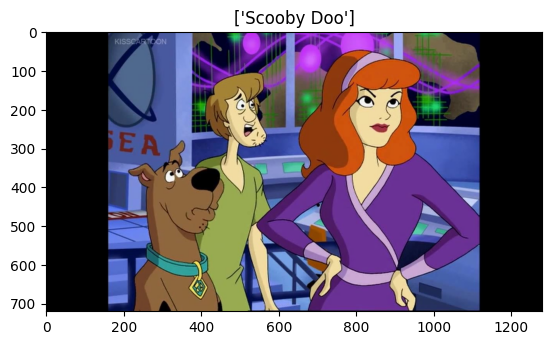

In [64]:
imshow(out, title=[class_names[x] for x in labels])

These dataloaders for the training and validation set can now be used to train/ finetune a CNN.